# A deep-learning neural network for image recognition
We present here a `Python Keras` implementation of a deep learning neural network for image recognition.

This is a high-level implementation with the code organised in blocks that resemble the main logical steps involved in developing a deep learning model. 

In the next session we'll se the detailed (lower level) implementation, to get a good peek at the code!

The publicly available `MNIST` dataset is used.

`Keras` is a popular `Python` library for deep learning models:
- wrapper for `TensorFlow`
- minimalistic
- modular
- easy to implement

The `MNIST` database (Modified National Institute of Standards and Technology database) is a large database of hand-written digits (details and data [here](http://yann.lecun.com/exdb/mnist/)):

![mnist](https://drive.google.com/uc?id=1KNK3-8qahQixvL-StpDAs6GoOUAHKSDy)

Deep learning consists of neural networks with multiple hidden layers that learn increasingly abstract and complex representations of the input data.
For instance, if we train a deep learning model to recognize hand-written digits (images):

- the first hidden layers might only learn local edge patterns;
- subsequent layers learns more complex representations of the data;
- the last layer will classify the image as one of ten digits.

For image recognition we use a specific deep learning architecture: **convolutional neural networks** (*CNN*), which assume that input data are images, thereby greatly reducing the number of model parameters to be tuned (more on *CNN's* later in the course).


## 1. SET UP

- import libraries
- set seed (for reproducibility)

In [ ]:
!wget -O support_code.py https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/lab_day1/support_code.py
%run support_code.py

--2022-08-25 15:19:35--  https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/lab_day1/support_code.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5160 (5.0K) [text/plain]
Saving to: ‘support_code.py’

support_code.py     100%[===================>]   5.04K  --.-KB/s    in 0s      

2022-08-25 15:19:36 (59.8 MB/s) - ‘support_code.py’ saved [5160/5160]

Import all libraries: yes
importing libraries
Defining functions
DONE!


In [ ]:
n = 132
set_seeds(n)

## 2. LOAD THE DATA

- choose how many training and test examples to load from the MNIST dataset

We load the data from the MNIST dataset, and assign them to the training and testing sets. 

Image data is generally harder to work with than flat relational data. The MNIST dataset is a beginner-friendly intoduction to working with image data: it contains $70\,000$ labeled images of handwritten digits. These are grey-scale images, 28 x 28 pixels.

The MNIST dataset comprises $60\,000$ training observations and $10\,000$ test observations: the function `load_data()` automatically assigns these to the training and testing sets.

In [ ]:
ntrain = 40000
ntest = 10000
(X_train, y_train, X_test, y_test) = load_data(ntrain,ntest)

A little sanity check

In [ ]:
print("Size of the training set")
print(X_train.shape)
print("Size of the test set")
print(X_test.shape)

Size of the training set
(40000, 28, 28)
Size of the test set
(10000, 28, 28)


Let's have a look at one such image:

First training label:  4


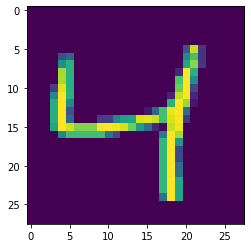

In [ ]:
i = 2
print("First training label: ",y_train[i])
plt.imshow(X_train[i, :, :])

By default the matplotlib function `imshow()` uses pseudocolors to plot grayscale images; if you want to display the actual grayscale image, you can specify the color mapping parameters:

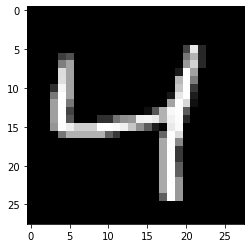

In [ ]:
plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)

## 3. CONFIGURE THE PARAMETERS

Define model parameters:

- input shape
- n. of classes: n. of classes to predict (10 digits, in the MNIST problem)
- batch size: DL models typically do not process the entire dataset at once, rather break it in **batches**
- n. of epochs: n. of **iterations** over the entire dataset

In [ ]:
(img_rows,img_cols,n_classes,batch_size,n_epochs) = set_parameters(28,28,10,64,20)

Data have been split into a **training** and a **testing set**, and within these into a **three-dimensional array** $X$ of **features** (samples x pixels x pixels) and a vector $y$ of labels (0-9 digits).

Each record in the 3-D array $X$ is a 28 x 28 matrix of grayscale intensities (1 byte = 8 bits = 0 - 255 values). Grayscale (black-n-white) images only use one color channel. Colour images use three channels (e.g. RGB) and each image (record) is therefore a 3-D matrix (pixels x pixels x 3).

## 4. DATA PREPROCESSING

- first, we need to explicitly declare the **depth of the image representation** array: in the case of grayscale images there is only one channel, and this dimension is 1
- we then **convert the input data type to `float32`** and **normalize the data** values to the range $[0, 1]$. These are operational modifications necessary to speed up and optimize the calculations.
- finally, **label vectors are converted to class matrices**. This serves to convert a vector of numerical digits to a matrix of ten classes per observation, which is a better suited representation for a classification problem.

In [ ]:
(X_train,X_test,y_train,y_test,input_shape) = preprocess(X_train,X_test,y_train,y_test,img_rows,img_cols,n_classes)

declare the correct depth of the image (channels)
normalize input data
prepare the categorical output matrix


In [ ]:
print("Modified array dimensions:")
print(X_train.shape) 
print(input_shape)  

Modified array dimensions:
(40000, 28, 28, 1)
(28, 28, 1)


Let's take a look at the output matrix: the first four training examples(labels)

In [ ]:
print(y_train[0:4]) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Your turn! QUESTION: which digits are these?**

## 5. BUILD THE MODEL

We now define our deep-learning **neural network architecture**, and start building our model for image recognition.

First, we declare a [sequential model](https://keras.io/guides/sequential_model/), that is a sequence of layers each with one input tensor and one output tensor. 
Then we add a first convolutional layer ([Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)) to our model; parameters are:

- number of convolution filters (n. of kernels to convolve with the input data)
- number of rows and columns in each convolution kernel
- type of activation function
- shape of the input array


In [ ]:
model = build_model(input_shape, n_classes)

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               1179776   
                                                      

## 6. COMPILE THE MODEL

The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase:

- loss function (objective of the optimizer)
- optimizer (core machinery used to find the weights of the model: learning) 
- metrics (used to evaluate the model)

All this pieces are put together (+ the specified network architecture) in the model compilation step.

In [ ]:
model = compile_model(model)

model compiled!


## 7. TRAIN THE MODEL

We then fit the model on the training data, specifying:

- the batch size
- the number of epochs to train the model

In [ ]:
trained_model = train_model(model,X_train,y_train,batch_size,n_epochs,1)

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 2.2774 - accuracy: 0.1317
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 2.2029 - accuracy: 0.2278
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 2.1075 - accuracy: 0.3249
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 1.9881 - accuracy: 0.4097
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 1.8457 - accuracy: 0.4810
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 1.6892 - accuracy: 0.5415
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 1.5274 - accuracy: 0.5913
Epoch 8/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3741 - accuracy: 0.6278
Epoch 9/20
625/625 [==============================] - 3s 5ms/step - loss: 1.2464 - accuracy: 0.6543
Epoch 10/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1364 - accuracy: 0.6789

## 8. TEST THE MODEL

We can now measure the performance (in terms of prediction accuracy) of the trained deep-learning model for image recognition. 
To measure the performance, we applied our trained model to independent test data.

In [ ]:
(score, confusion_matrix) = evaluate_model(trained_model, X_test, y_test)

model evaluated


Let's look at the eaccuracy of the model:

In [ ]:
print(round(score[1],4))

0.8803


And the **confusion matrix**

In [ ]:
print(confusion_matrix)

[[ 953    0    2    2    0    2   12    1    8    0]
 [   0 1099   13    6    1    2    3    0   10    1]
 [  17    7  885   16   15    0   26   25   41    0]
 [   2    9   24  897    0   18    2   21   28    9]
 [   2    4    5    0  849    0   29    2    7   84]
 [  25   12    5   78   31  666   19    6   41    9]
 [  18   13    8    0   12   20  881    2    4    0]
 [   1   23   27    5    9    0    2  890    8   63]
 [  13   21   11   44   14   28   13   14  799   17]
 [  17   11    8   12   34    6    1   28    8  884]]


### Confusion matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is another way to express the accuracy of your predictions. It's a square matrix, with as many rows (and columns) as your classes. Rows represent *true values* and columns represent *predicted values*. On the main diagonal are thus reported the correct predictions, while off-diagonal elements represent errors.

We use the [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function part of [scikit-learn library](https://scikit-learn.org/stable/).

**Your turn! QUESTION: Can you spot the most ambiguous, often confounded classes?**